In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import re

import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import src.data_prep_helpers
from src.utils import show_df, show_df_dtypes_nans
from src.ts_helpers import check_stationarity
import src.visualization_helpers as vh
from src.data_prep_helpers import add_corona_dates
from src.feature_helpers import calculate_daylight, get_too_hot_cold
from src.weather_helpers import (
    get_airport_weather_station_metadata,
    get_weather_by_station,
)

In [2]:
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

In [3]:
import pandas as pd
df = pd.read_parquet('storm_sample.parquet')
df.reset_index(inplace=True)
df.columns=["site","measuretime", "measurevalue"]
df.groupby('site').size().sort_values(ascending=True)
df = df.sort_values(['site','measuretime'],ascending=True).groupby('site').head(df.shape[0])

In [4]:
df['time'] = pd.to_datetime(df['measuretime']).dt.strftime('%Y-%m-%d %H:%M:%S')

In [5]:
df['time'] = pd.to_datetime(df['time'])
df.columns = ['site', 'measuretime', 'load','time']
df =df[["time","site","load"]]

In [ ]:
total = []
for siteID in range(1, 101):
    site = df[df.site==siteID]
    shape1 = site.shape[0]
    site = site.drop_duplicates(["time"], keep="last")
    shape2 = site.shape[0]
    site = site.set_index(["time"])
    site = site.asfreq(freq='5T', fill_value=0)
    shape3 = site.shape[0]
    if(shape2 < shape1):
        print("has duplicated data:  ", siteID, "----->  ", shape1, "----> ", shape1-shape2)
    total.append(site)

In [ ]:
df = pd.concat(total)
df = df.reset_index()
df["month"] = df["time"].dt.month_name()
df["weekday"] = df["time"].dt.day_name()
df["weekday_int"] = df["time"].dt.weekday
df["is_weekend"] = df["weekday_int"].isin([5, 6])
df["hour"] = df["time"].dt.hour
df["year"] = df["time"].dt.year

Wall time: 1.11 s


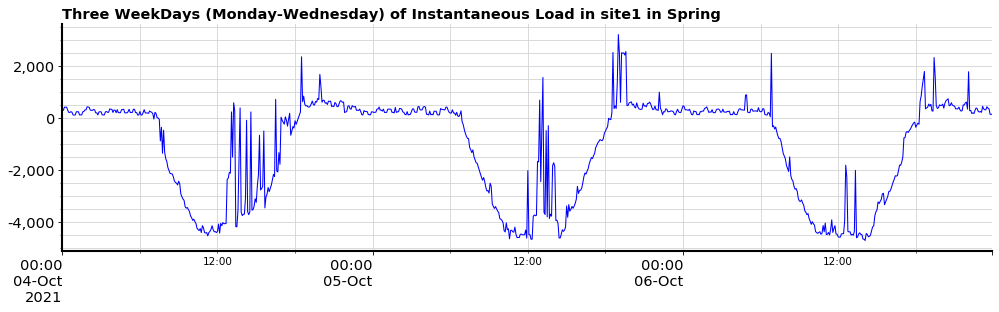

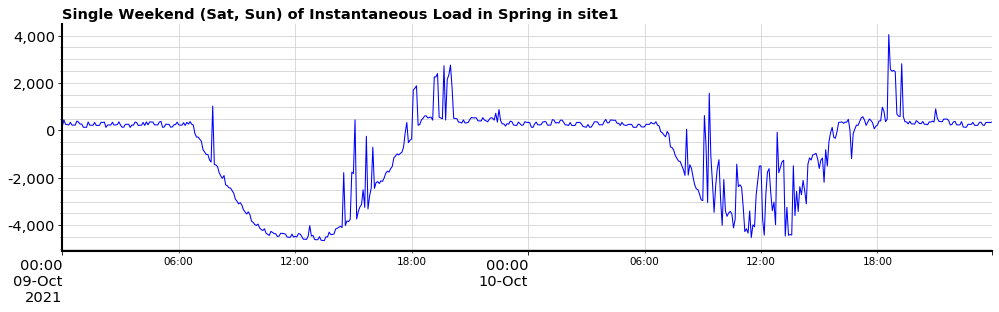

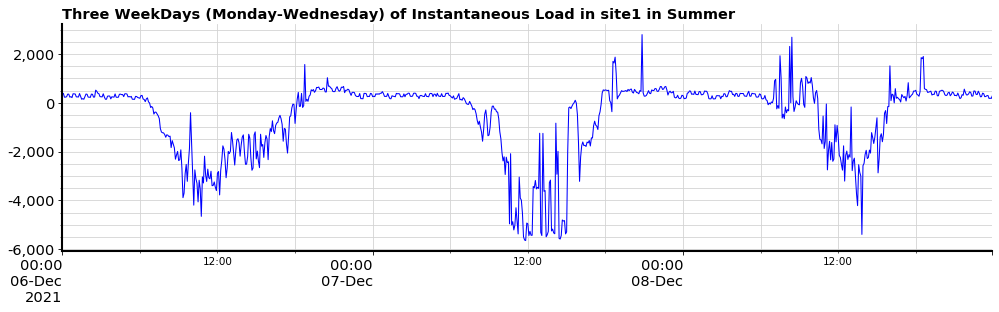

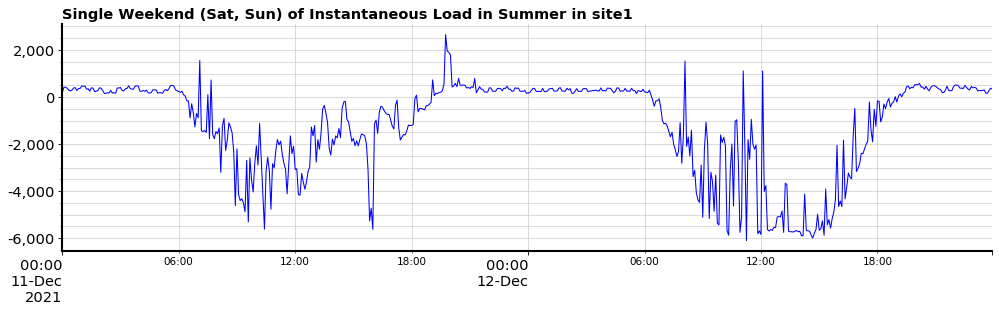

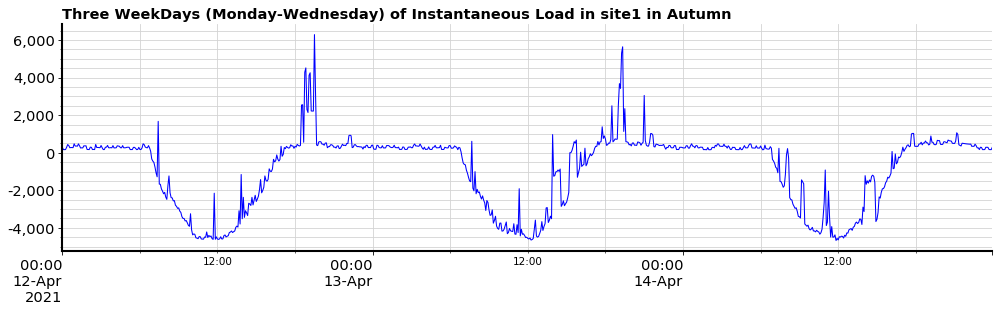

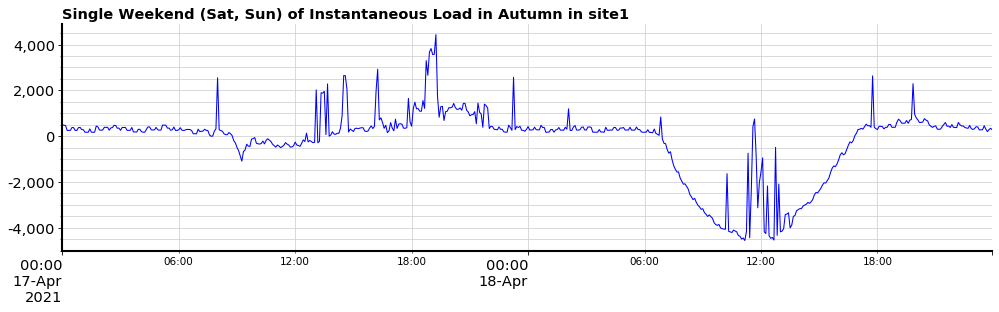

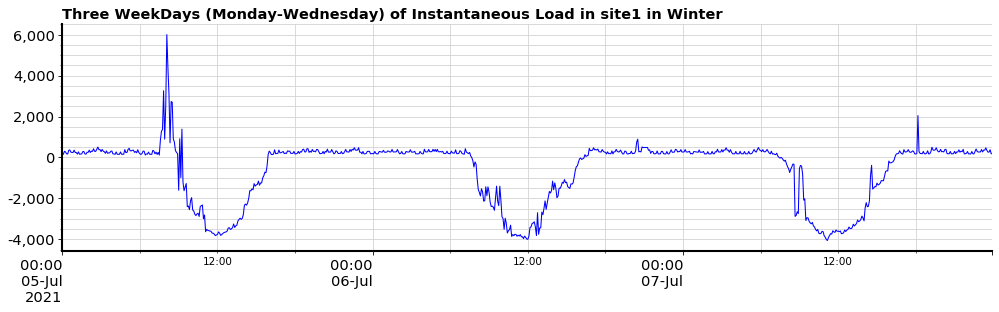

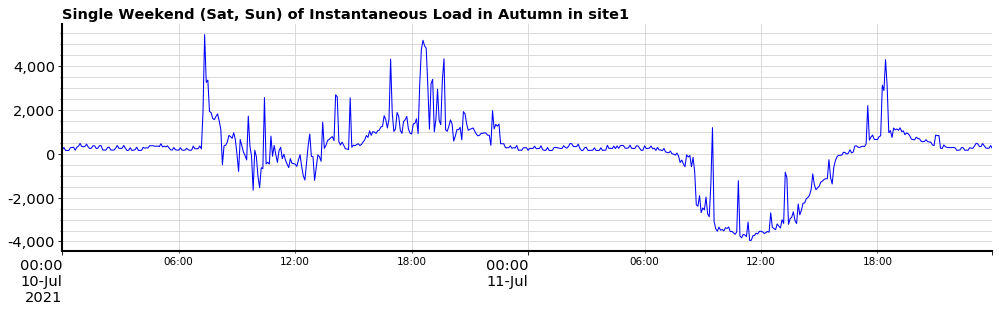

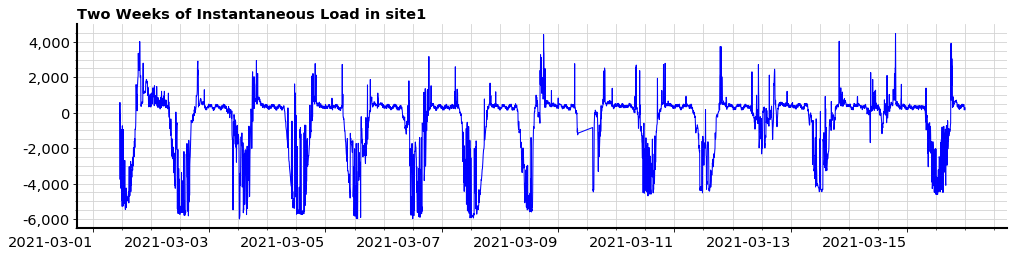

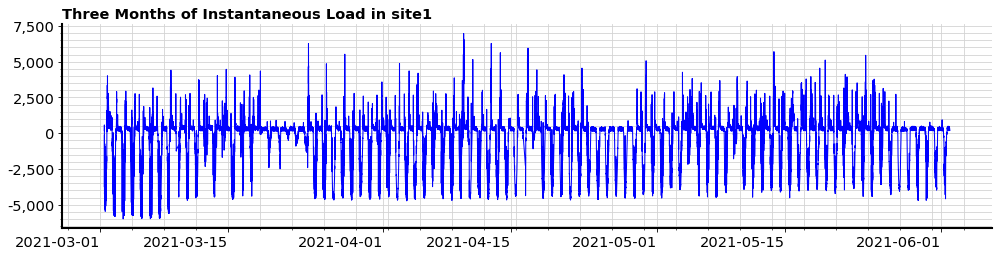

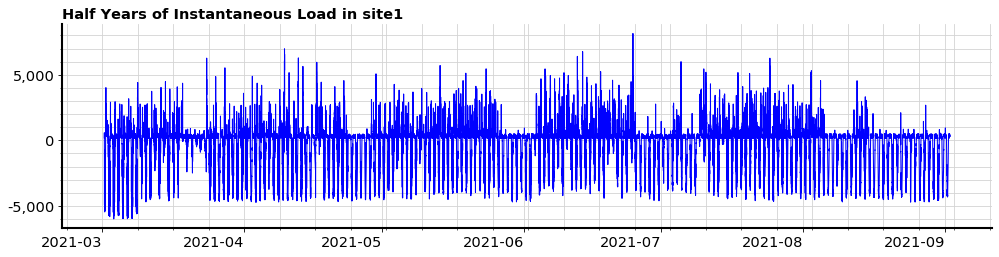

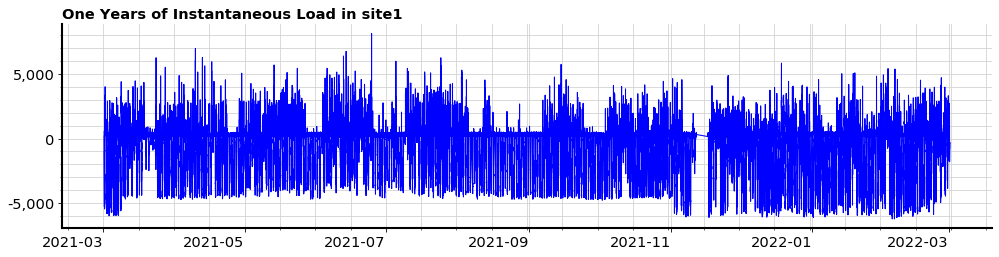

In [21]:
%%time
SITEID = 1
sitename = "site"+str(SITEID)
ts = df[df.site==SITEID]["load"]


plot_dict = {sitename: [ts.loc["2021-10-04":"2021-10-06"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Three WeekDays (Monday-Wednesday) of Instantaneous Load in {sitename} in Spring",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-10-09":"2021-10-10"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Single Weekend (Sat, Sun) of Instantaneous Load in Spring in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)


plot_dict = {sitename: [ts.loc["2021-12-06":"2021-12-08"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Three WeekDays (Monday-Wednesday) of Instantaneous Load in {sitename} in Summer",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-12-11":"2021-12-12"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Single Weekend (Sat, Sun) of Instantaneous Load in Summer in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)


plot_dict = {sitename: [ts.loc["2021-04-12":"2021-04-14"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Three WeekDays (Monday-Wednesday) of Instantaneous Load in {sitename} in Autumn",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-04-17":"2021-04-18"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Single Weekend (Sat, Sun) of Instantaneous Load in Autumn in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-07-05":"2021-07-07"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Three WeekDays (Monday-Wednesday) of Instantaneous Load in {sitename} in Winter",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-07-10":"2021-07-11"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Single Weekend (Sat, Sun) of Instantaneous Load in Autumn in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)


plot_dict = {sitename: [ts.loc["2021-03-01":"2021-03-15"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Two Weeks of Instantaneous Load in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-03-01":"2021-06-01"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Three Months of Instantaneous Load in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)



plot_dict = {sitename: [ts.loc["2021-03-01":"2021-09-01"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Half Years of Instantaneous Load in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-03-01":"2022-03-01"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"One Years of Instantaneous Load in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

Wall time: 855 ms


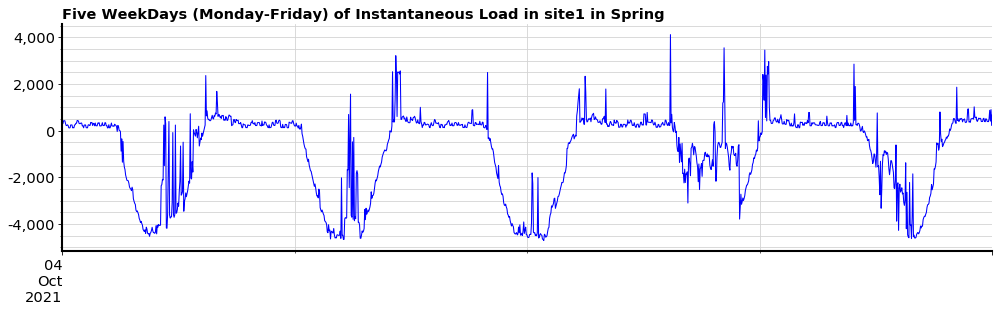

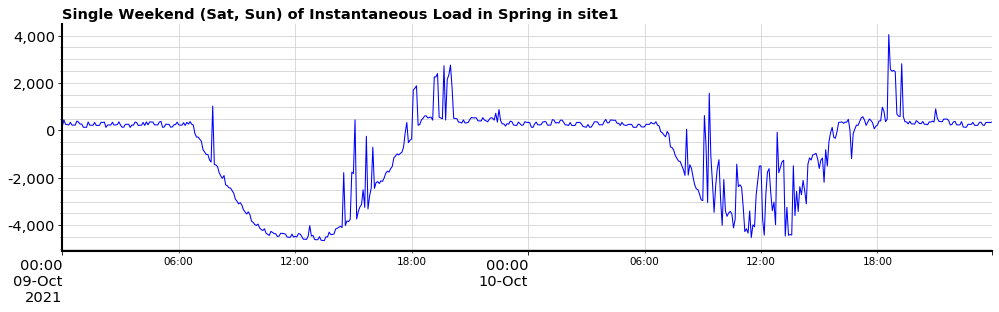

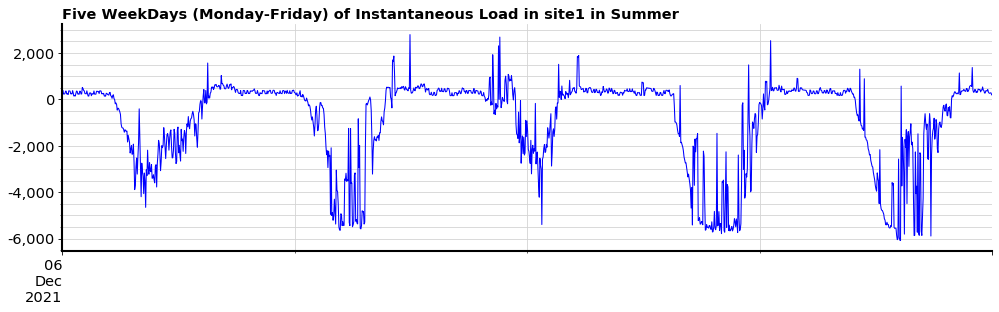

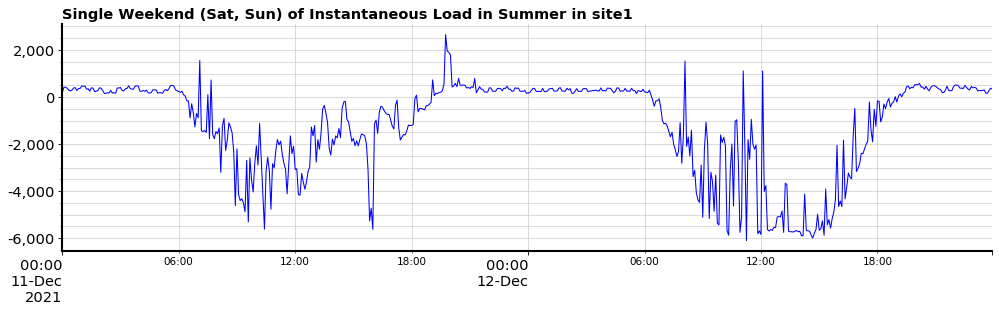

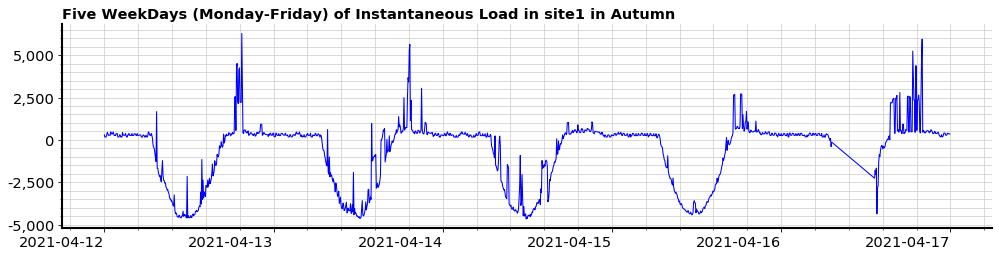

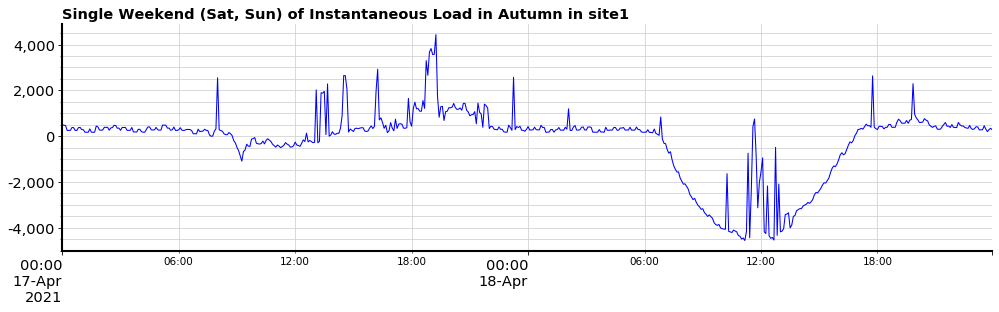

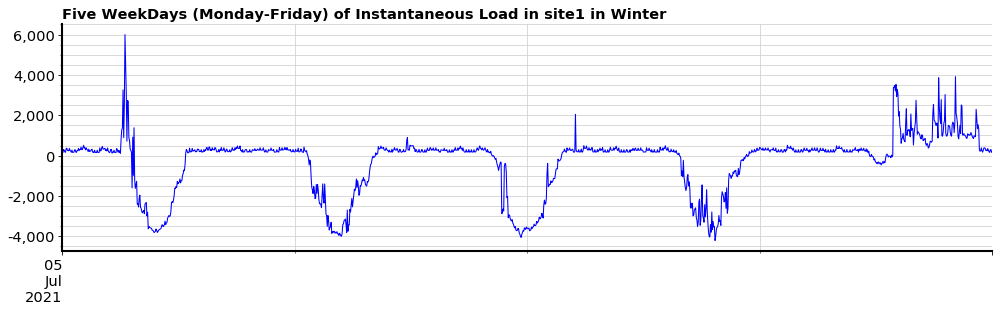

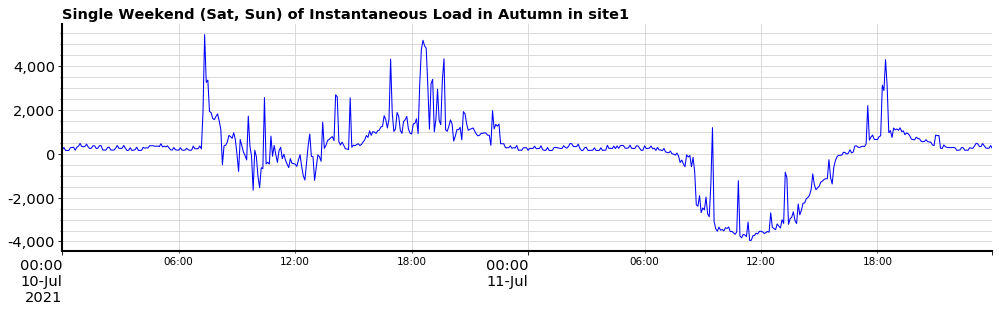

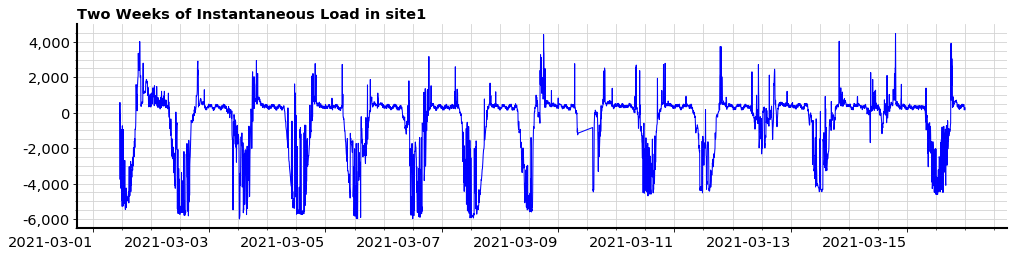

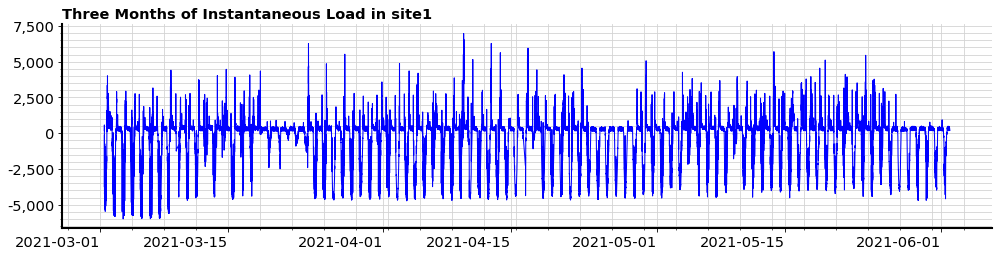

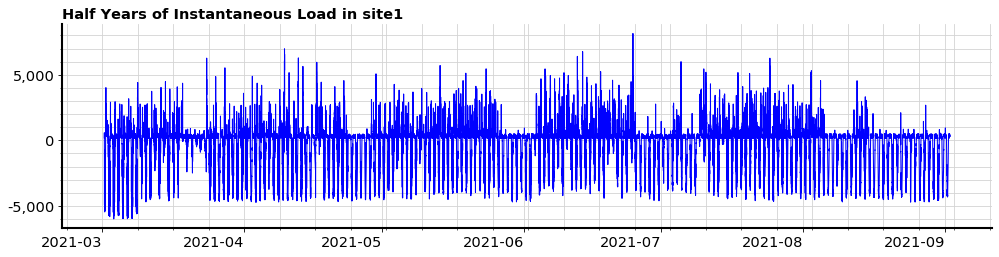

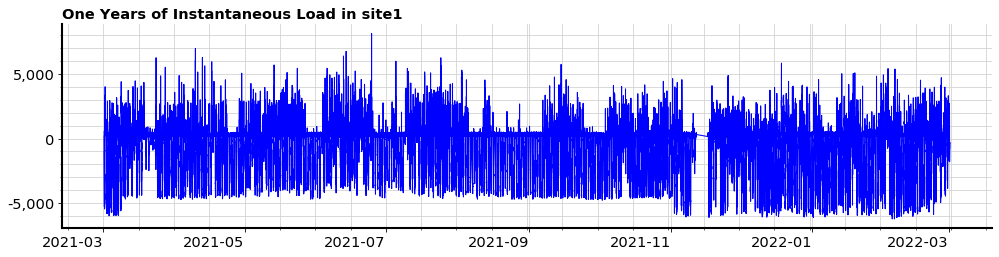

In [22]:
%%time
SITEID = 1
sitename = "site"+str(SITEID)
ts = df[df.site==SITEID]["load"]
#ts = df[df["country"] == country].set_index("utc_timestamp")["load"]


plot_dict = {sitename: [ts.loc["2021-10-04":"2021-10-08"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Five WeekDays (Monday-Friday) of Instantaneous Load in {sitename} in Spring",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-10-09":"2021-10-10"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Single Weekend (Sat, Sun) of Instantaneous Load in Spring in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)


plot_dict = {sitename: [ts.loc["2021-12-06":"2021-12-10"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Five WeekDays (Monday-Friday) of Instantaneous Load in {sitename} in Summer",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-12-11":"2021-12-12"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Single Weekend (Sat, Sun) of Instantaneous Load in Summer in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)


plot_dict = {sitename: [ts.loc["2021-04-12":"2021-04-16"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Five WeekDays (Monday-Friday) of Instantaneous Load in {sitename} in Autumn",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-04-17":"2021-04-18"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Single Weekend (Sat, Sun) of Instantaneous Load in Autumn in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-07-05":"2021-07-09"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Five WeekDays (Monday-Friday) of Instantaneous Load in {sitename} in Winter",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-07-10":"2021-07-11"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Single Weekend (Sat, Sun) of Instantaneous Load in Autumn in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)


plot_dict = {sitename: [ts.loc["2021-03-01":"2021-03-15"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Two Weeks of Instantaneous Load in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-03-01":"2021-06-01"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Three Months of Instantaneous Load in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)



plot_dict = {sitename: [ts.loc["2021-03-01":"2021-09-01"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"Half Years of Instantaneous Load in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

plot_dict = {sitename: [ts.loc["2021-03-01":"2022-03-01"], "blue", "-", 1]}
vh.plot_multi_ts(
    plot_dict,
    f"One Years of Instantaneous Load in {sitename}",
    zero_line_color="",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=12,
    dpi=75,
    xtick_halign="right",
    xtick_angle=0,
    fig_size=(16, 4),
)

**Observations**
1. On a daily basis, we see the same general shape from day to day suggesting a reasonably predictable daily seasonality.
2. From comparing the load across half years, there is no evidence of a trend in the timeseries.
3. The strongest solar insolation occurs during the 12pm each day. Maximum solar insolation in the summer is stronger than that in the Winter and Spring. In Autumn, maximum solar insolation sustains for only a short time (i.e., in March)

In [23]:
# Stationarity
adf_rows = ["ADF_Statistic", "p-value", "likely stationary"]
adf_rows

['ADF_Statistic', 'p-value', 'likely stationary']

In [24]:
%%time
check_stationarity(ts, f"load-{sitename}").style.apply(
    lambda x: ['background-color: yellow' if x.name in adf_rows else '' for i in x],
    axis=1
)

Wall time: 20.1 s


,Value,module
name,load-site1,nan
ADF_Statistic,-37.565288,adfuller
p-value,0.000000,adfuller
num_lags_used,67,adfuller
n_observations_used,103240,adfuller
IC_for_best,1619622.194613,adfuller
1%,-3.430413,adfuller
5%,-2.861568,adfuller
10%,-2.566785,adfuller
likely stationary,True,p-value < 0.05


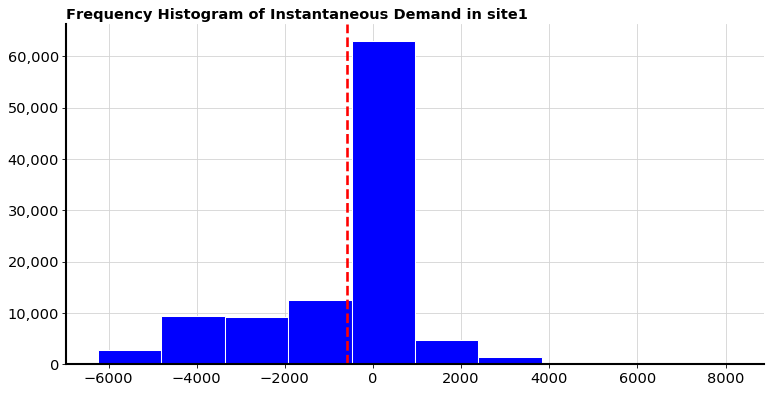

In [25]:
vh.plot_histogram(
    ts,
    f"Frequency Histogram of Instantaneous Demand in {sitename}",
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    dpi=75,
    x_thou_comma_sep=False,
    y_thou_comma_sep=True,
    fig_size=(12, 6),
)

Text(0, 0.5, 'probablity')

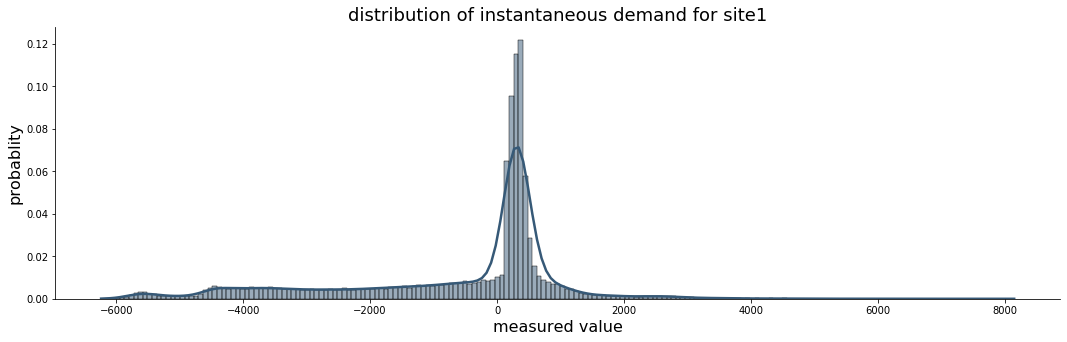

In [26]:
sns.histplot(data = df[df.site == SITEID], x="load", stat = "probability", kde = True)
plt.title('distribution of instantaneous demand for ' + sitename, fontsize=18)
plt.xlabel('measured value', fontsize=16)
plt.ylabel('probablity', fontsize=16)

**Observations**
1. The distribution is left-skewed.

Plot the auto-correlation of the electricity consumption timeseries in site1

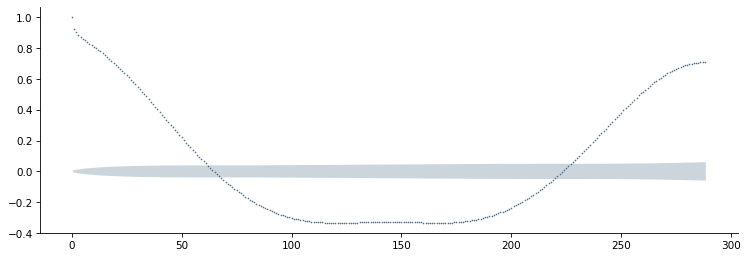

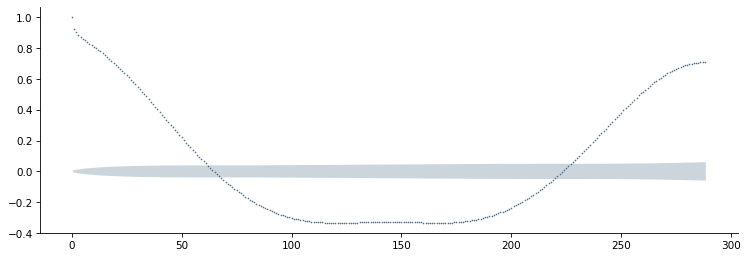

In [27]:
import statsmodels.api as sm
dpi=75
fig_size=(12, 4)
_, ax = plt.subplots(figsize=fig_size, dpi=dpi)
sm.graphics.tsa.plot_acf(ts.dropna(), lags=24*60/5 * 1, ax=ax, use_vlines= False, title=None, markersize = 0.5)

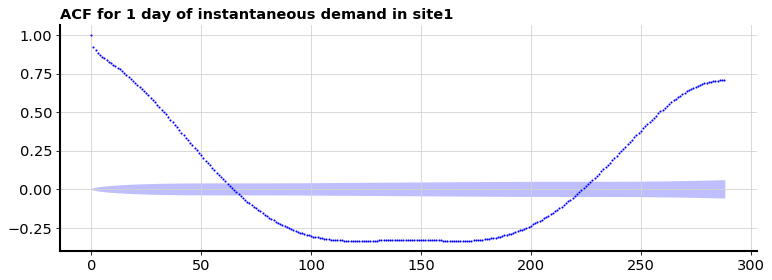

In [28]:
vh.plot_ts_acf(
    ts.dropna(),
    f"ACF for {1} day of instantaneous demand in {sitename}",
    24*60/5 * 1 ,
    1,
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    dpi=75,
    fig_size=(12, 4),
)

In [29]:
# Calculate autocorrelation
acf_values = acf( ts.dropna(), 24*60/5 * 1)
acf_values

array([1.        , 0.92411863, 0.89964523, 0.88175803, 0.87023289,
       0.85932614, 0.84807383, 0.83725607, 0.82679727, 0.81743545,
       0.80780749, 0.7975201 , 0.78711727, 0.7784503 , 0.76798928,
       0.75590106, 0.74293962, 0.72945409, 0.71764597, 0.70463644,
       0.69142274, 0.67846888, 0.66533515, 0.65230388, 0.63754721,
       0.62335597, 0.60891203, 0.59419318, 0.57864162, 0.56377733,
       0.54847445, 0.53289209, 0.51674072, 0.50138912, 0.48557904,
       0.46924941, 0.4526599 , 0.43524824, 0.41782738, 0.40101329,
       0.38501915])

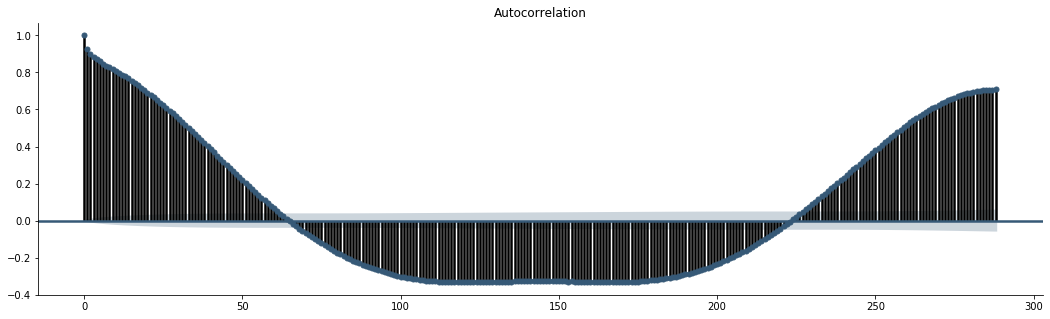

In [30]:
# Plot autocorrelation
plot_acf( ts.dropna(), lags=24*60/5 * 1);

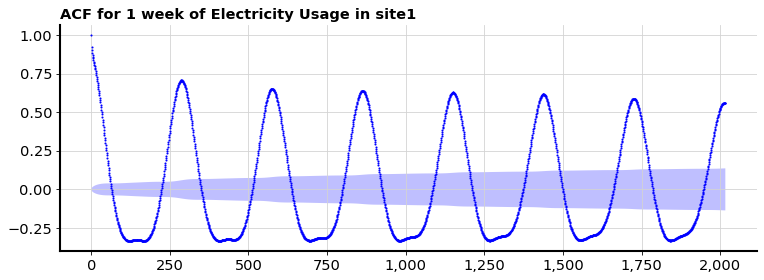

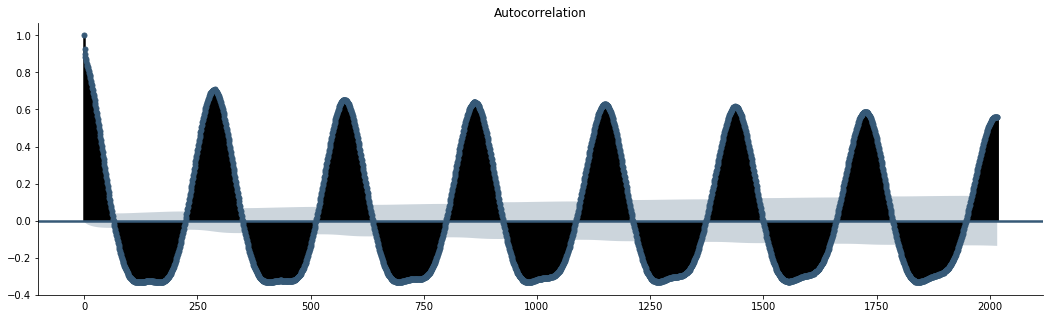

In [31]:
vh.plot_ts_acf(
    ts.dropna(),
    f"ACF for 1 week of Electricity Usage in {sitename}",
    24*60/5 * 7,
    1,
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    dpi=75,
    fig_size=(12, 4),
)

# Calculate autocorrelation
acf_values = acf(ts, 24*60/5 * 7)
acf_values


# Plot autocorrelation
plot_acf(ts, lags=24*60/5 * 7);

**Observations**
1. There is predictably a strong autocorrelation in the instantaneous demand in a single site.

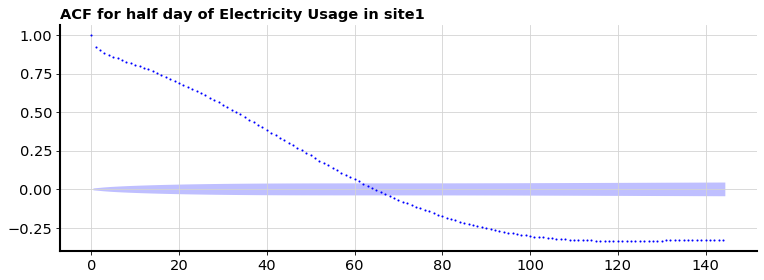

In [32]:
vh.plot_ts_acf(
    ts.dropna(),
    f"ACF for half day of Electricity Usage in {sitename}",
    (24*0.5)*60/5 * 1,
    1,
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    dpi=75,
    fig_size=(12, 4),
)

In [33]:
# Calculate autocorrelation
acf_values = acf(ts.dropna(), (24*0.5)*60/5 * 1)
acf_values

array([1.        , 0.92411863, 0.89964523, 0.88175803, 0.87023289,
       0.85932614, 0.84807383, 0.83725607, 0.82679727, 0.81743545,
       0.80780749, 0.7975201 , 0.78711727, 0.7784503 , 0.76798928,
       0.75590106, 0.74293962, 0.72945409, 0.71764597, 0.70463644,
       0.69142274, 0.67846888, 0.66533515, 0.65230388, 0.63754721,
       0.62335597, 0.60891203, 0.59419318, 0.57864162, 0.56377733,
       0.54847445, 0.53289209, 0.51674072, 0.50138912, 0.48557904,
       0.46924941, 0.4526599 , 0.43524824, 0.41782738, 0.40101329,
       0.38501915])

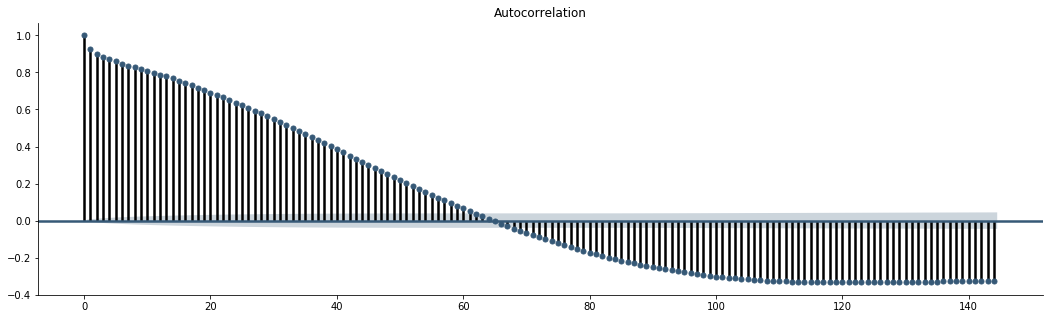

In [34]:
# Plot autocorrelation
plot_acf(ts.dropna(), lags=(24*0.5)*60/5 * 1);

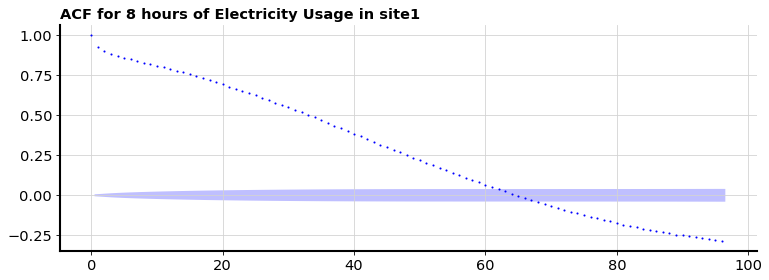

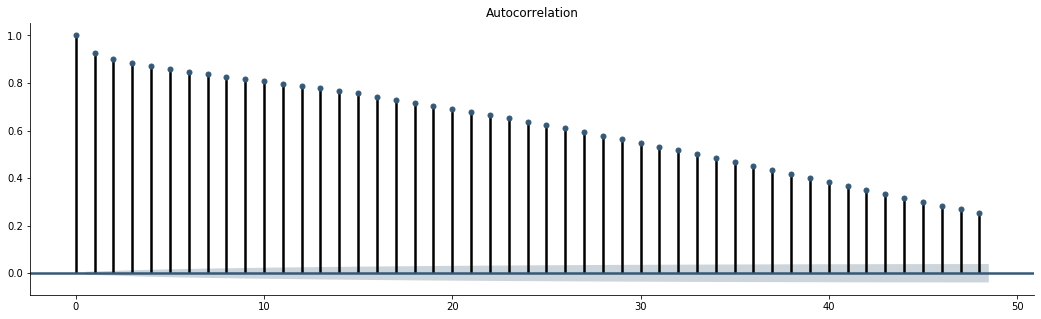

In [35]:
vh.plot_ts_acf(
    ts.dropna(),
    f"ACF for 8 hours of Electricity Usage in {sitename}",
    (24/3)*60/5 * 1,
    1,
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    dpi=75,
    fig_size=(12, 4),
)

# Calculate autocorrelation
acf_values = acf( ts.dropna(), (24/3)*60/5 * 0.5)
acf_values


# Plot autocorrelation
plot_acf( ts.dropna(), lags=(24/3)*60/5 * 0.5);

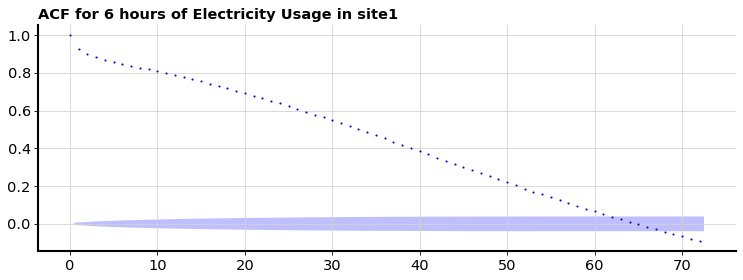

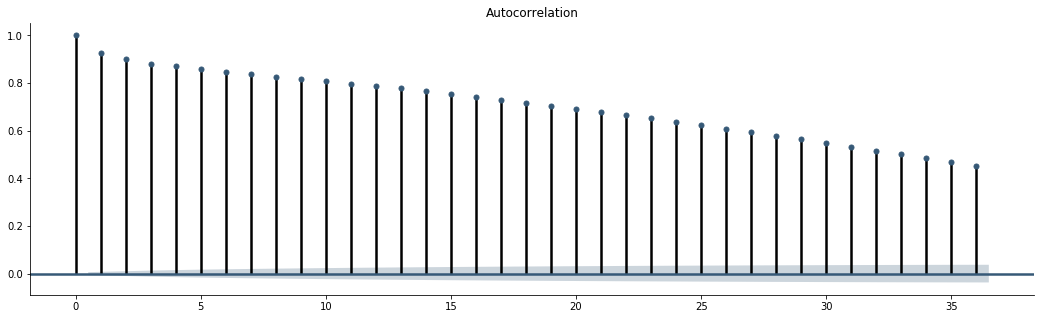

In [36]:
vh.plot_ts_acf(
    ts.dropna(),
    f"ACF for 6 hours of Electricity Usage in {sitename}",
    (24/4)*60/5 * 1,
    1,
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    dpi=75,
    fig_size=(12, 4),
)

# Calculate autocorrelation
acf_values = acf(ts.dropna(), (24/4)*60/5 * 0.5)
acf_values


# Plot autocorrelation
plot_acf(ts.dropna(), lags=(24/4)*60/5 * 0.5);

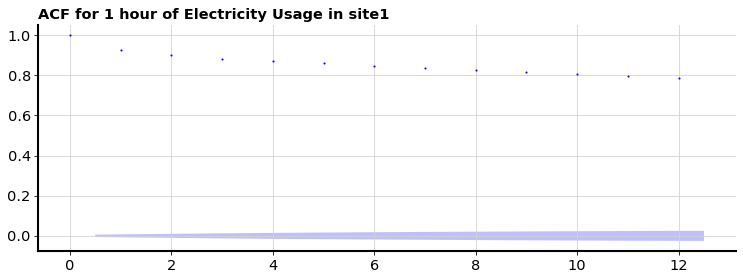

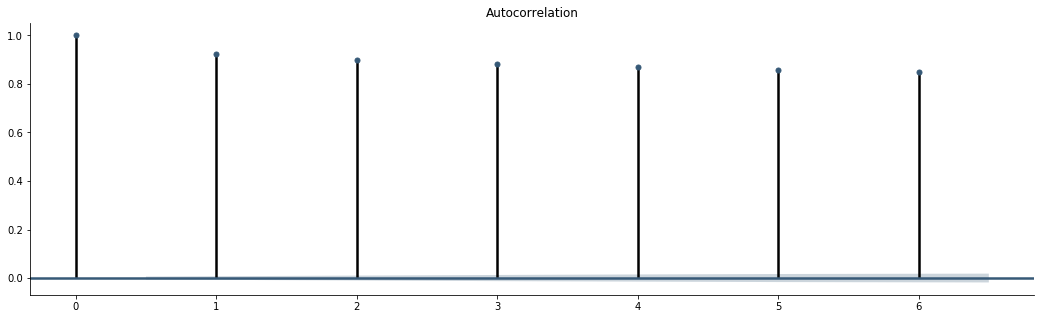

In [37]:
vh.plot_ts_acf(
    ts.dropna(),
    f"ACF for 1 hour of Electricity Usage in {sitename}",
    (24/24)*60/5 * 1,
    1,
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    dpi=75,
    fig_size=(12, 4),
)

# Calculate autocorrelation
acf_values = acf(ts.dropna(), (24/24)*60/5 * 0.5)
acf_values


# Plot autocorrelation
plot_acf(ts.dropna(), lags=(24/24)*60/5 * 0.5);

In [39]:
tscopy = ts

In [40]:
ts2 = tscopy.asfreq(freq=None, fill_value=0)
ts2

time
2021-03-01 11:00:00     183.787125
2021-03-02 11:00:00   -3813.582764
2021-03-03 11:00:00   -1521.348999
2021-03-04 11:00:00   -5059.250977
2021-03-05 11:00:00   -2123.762207
                          ...     
2022-02-24 11:00:00     122.524750
2022-02-25 11:00:00     413.521027
2022-02-26 11:00:00     173.576721
2022-02-27 11:00:00    -704.517334
2022-02-28 11:00:00   -2935.488770
Freq: D, Name: load, Length: 365, dtype: float64

In [42]:
ts3 = tscopy.asfreq(freq='5T', fill_value=0)
ts3

time
2021-03-01 11:00:00     183.787125
2021-03-01 11:05:00    -433.941833
2021-03-01 11:10:00     576.887390
2021-03-01 11:15:00   -3767.635986
2021-03-01 11:20:00    -112.314354
                          ...     
2022-03-01 10:35:00    -311.417084
2022-03-01 10:40:00    -541.151001
2022-03-01 10:45:00    -622.834167
2022-03-01 10:50:00    -740.253723
2022-03-01 10:55:00    -342.048248
Freq: 5T, Name: load, Length: 105120, dtype: float64

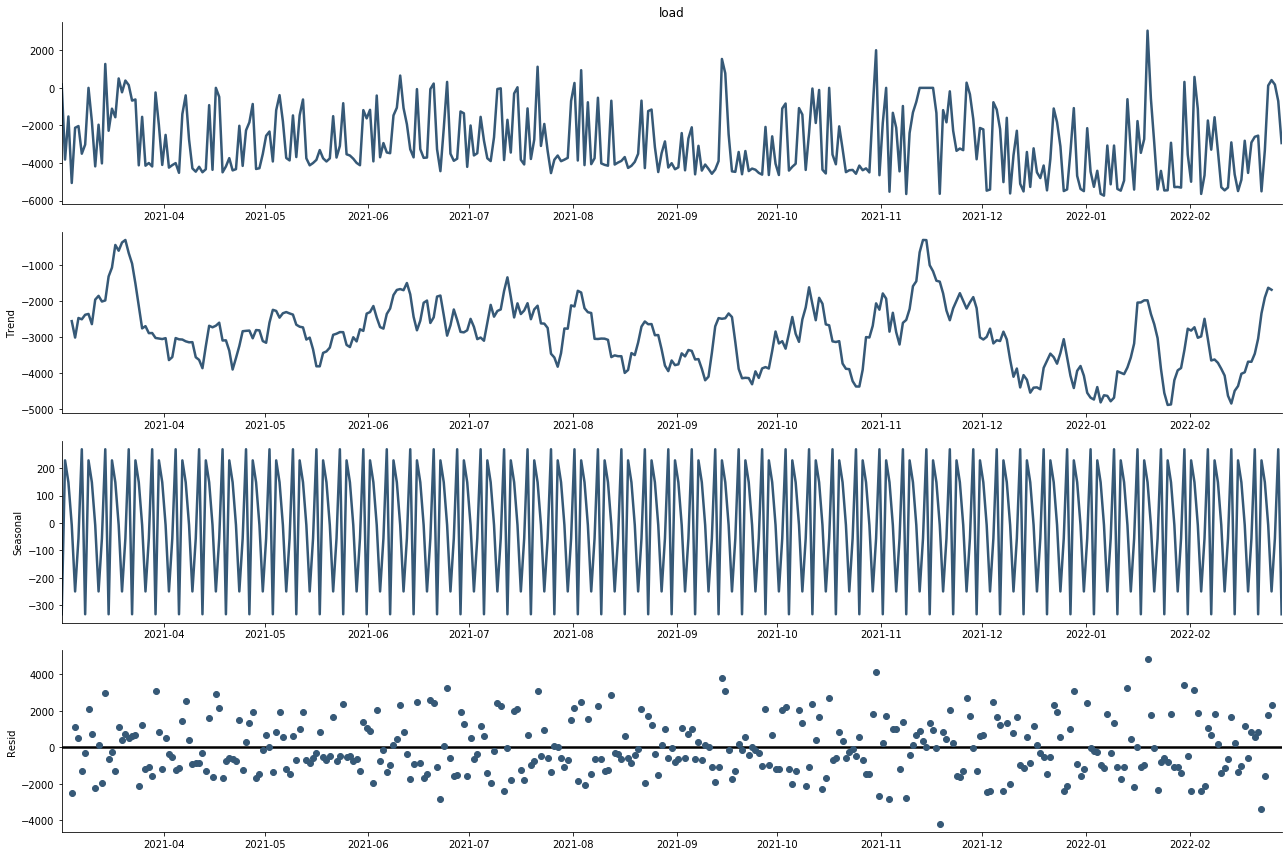

In [44]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 12
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Decompose and plot
decomposed = seasonal_decompose(ts2, model='additive')
decomposed.plot();

Check stationarity of the transformed timeseries for site1

In [1]:
%%time
check_stationarity(ts, f"{sitename}-transformed").style.apply(
    lambda x: ['background-color: yellow' if x.name in adf_rows else '' for i in x],
    axis=1
)

NameError: name 'check_stationarity' is not defined

**Observations**
1. The ADF test suggests that the transformed timeseries data is stationary. There doesn't appear to be visual evidence of the intra-day pattern of usage (peak usage during the morning and night) after applying this yearly differencing transformation. Also, there aren't strong cycles that we can visually identify after the transformation. So, the transformed load timeseries in site1 is stationary.

Plot a histogram of the transformed electricity usage timeseries data

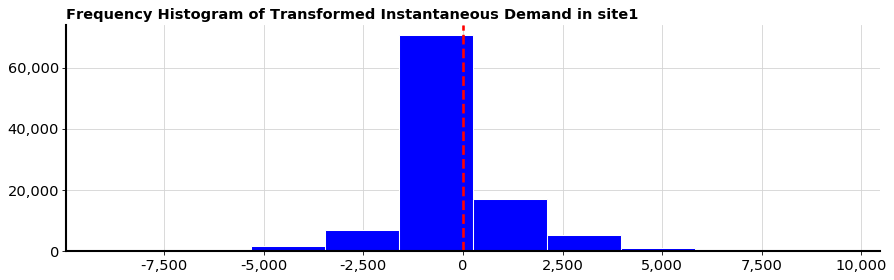

In [48]:
vh.plot_histogram(
    ts,
    f"Frequency Histogram of Transformed Instantaneous Demand in {sitename}",
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    dpi=75,
    x_thou_comma_sep=True,
    y_thou_comma_sep=True,
    fig_size=(14, 4),
)

In [49]:
data = df[df.site == SITEID]["load"]
data = data.diff(24*60/5).dropna()
data

time
2021-03-02 11:00:00   -3997.369888
2021-03-02 11:05:00   -1643.873596
2021-03-02 11:10:00   -6269.183289
2021-03-02 11:15:00     -51.052002
2021-03-02 11:20:00   -5523.824318
                          ...     
2022-03-01 10:35:00    2333.075348
2022-03-01 10:40:00    2241.181763
2022-03-01 10:45:00    2036.973938
2022-03-01 10:50:00    2021.658386
2022-03-01 10:55:00    2455.600189
Name: load, Length: 103020, dtype: float64

Text(0, 0.5, 'probablity')

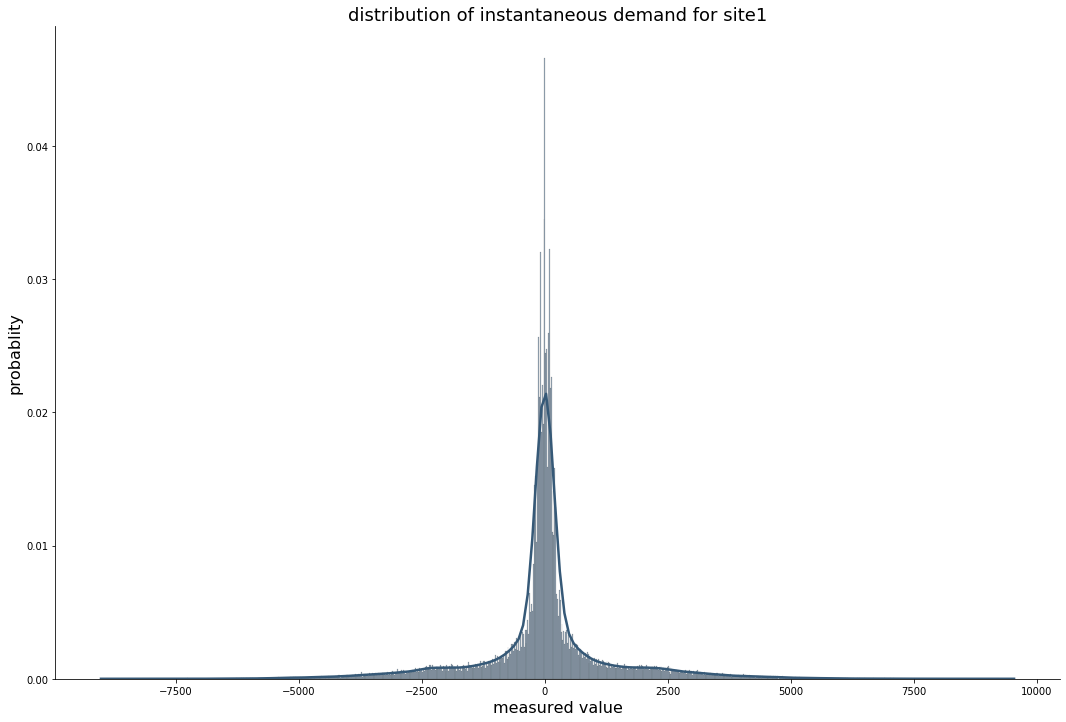

In [50]:
#data = copysite[copysite.site == SITEID]
#data = data.diff(24*60/5).dropna()

data = df[df.site == SITEID]
data = data["load"].diff(24*60/5).dropna()
sns.histplot(data = data, stat = "probability", kde = True)
plt.title('distribution of instantaneous demand for ' + sitename, fontsize=18)
plt.xlabel('measured value', fontsize=16)
plt.ylabel('probablity', fontsize=16)

**Observations**
1. This transformed electricity consumption timeseries in site1 appears to follow a normal distribution, with a weak right skew likely due to the presence of outliers which correspond to slightly off-cycle usage that could not be removed by the differencing.

The seasonal decomposition (to separate the underlying seasonality and trend in the transformed data) of this differenced timeseries in `ES` is shown below

In [53]:
ts = ts.asfreq(freq=None, fill_value=0)

In [56]:
result = seasonal_decompose(ts, model="additive")
result

Wall time: 65.8 ms


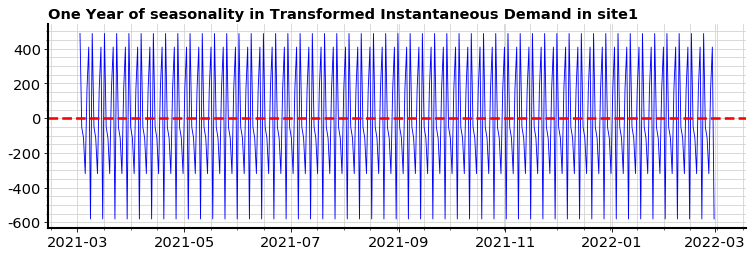

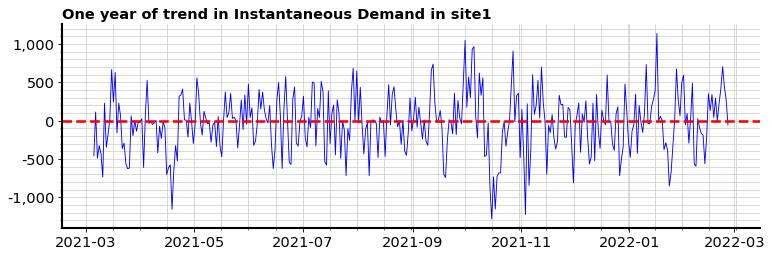

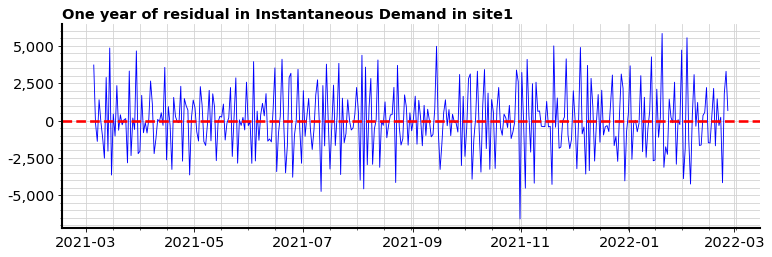

In [57]:
%%time
#result = seasonal_decompose(ts.asfreq(None), model="additive")
result = seasonal_decompose(ts, model="additive")
plot_dict = {"wspd": [result.seasonal.loc["2021-03-01":"2022-03-01"], "blue", "-", 0.85]}
vh.plot_multi_ts(
    plot_dict,
    f"One Year of seasonality in Transformed Instantaneous Demand in {sitename}",
    zero_line_color="red",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=14,
    dpi=75,
    fig_size=(12, 4),
)
plot_dict = {"wspd": [result.trend.loc["2021-03-01":"2022-03-01"], "blue", "-", 0.85]}
vh.plot_multi_ts(
    plot_dict,
    f"One year of trend in Instantaneous Demand in {sitename}",
    zero_line_color="red",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=14,
    dpi=75,
    fig_size=(12, 4),
)

plot_dict = {"wspd": [result.resid.loc["2021-03-01":"2022-03-01"], "blue", "-", 0.85]}
vh.plot_multi_ts(
    plot_dict,
    f"One year of residual in Instantaneous Demand in {sitename}",
    zero_line_color="red",
    legend_loc=(1, 1),
    tick_label_fontsize=14,
    ptitle_fontsize=14,
    legend_fontsize=14,
    dpi=75,
    fig_size=(12, 4),
)

In [58]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 12
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

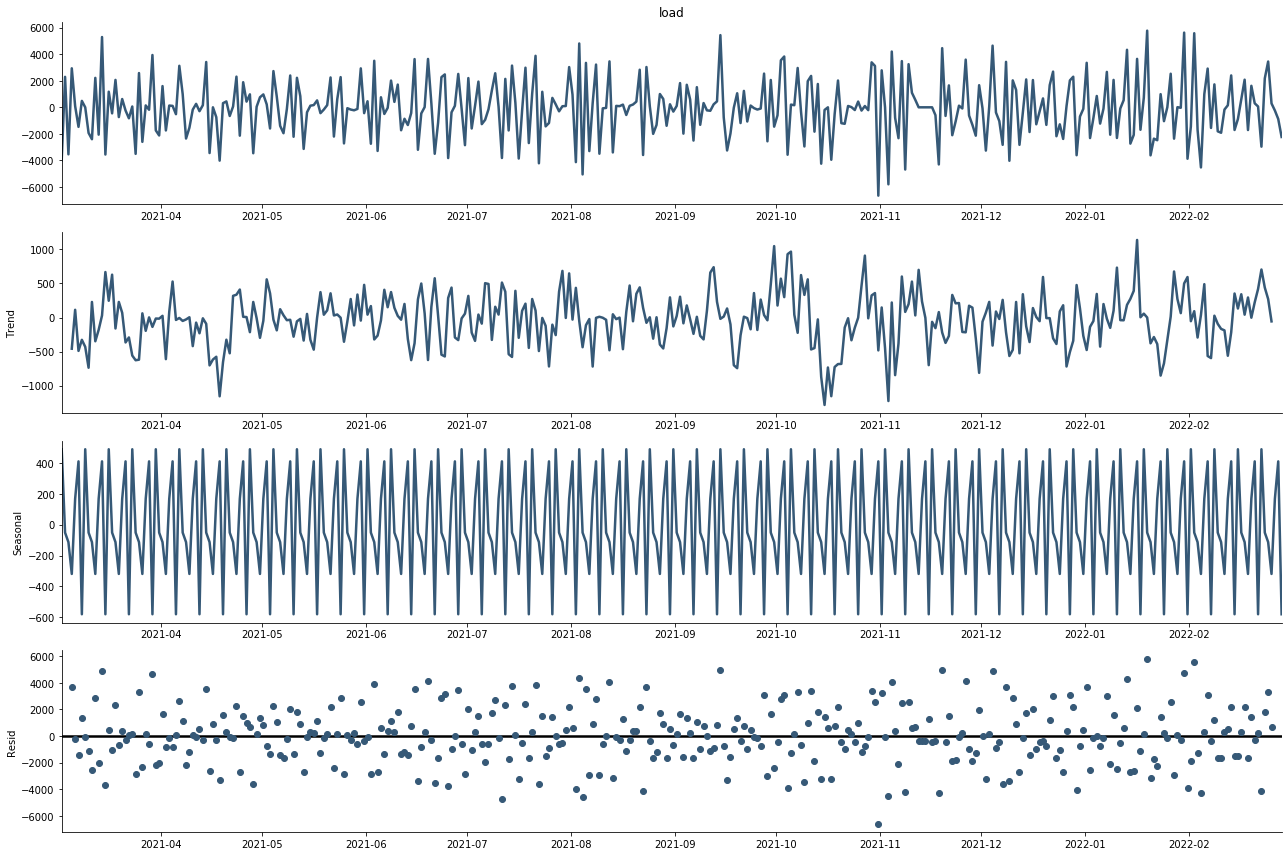

In [59]:
# Decompose and plot
decomposed = seasonal_decompose(ts, model='additive')
decomposed.plot();

,site,load
time,,
2021-03-01 11:00:00,100,546.256165
2021-03-01 11:05:00,100,566.676941
2021-03-01 11:10:00,100,561.571777
2021-03-01 11:15:00,100,505.414581
2021-03-01 11:20:00,100,597.308167


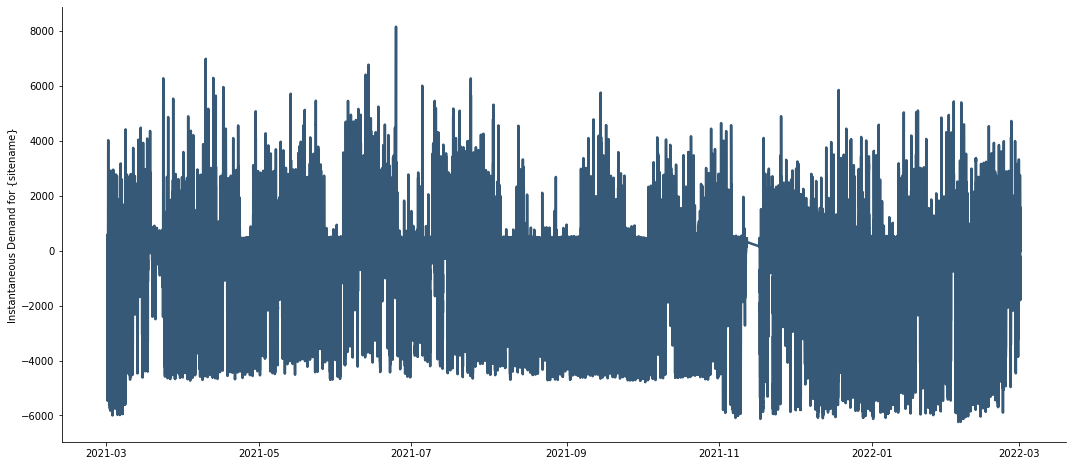

In [60]:
# combine into one dataframe and set datetime index
#ercot_df = pd.concat(df_list)
#ercot_df.set_index('time', inplace=True)

# fix missing/duplicate values
#ercot_df = ercot_df.groupby('time').mean()
#ercot_df = ercot_df.asfreq('H', method='pad')

# plot and show first 5 rows


import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


plt.plot(df[df.site==SITEID]['load'])
plt.ylabel('Instantaneous Demand for {sitename}')
site.head()

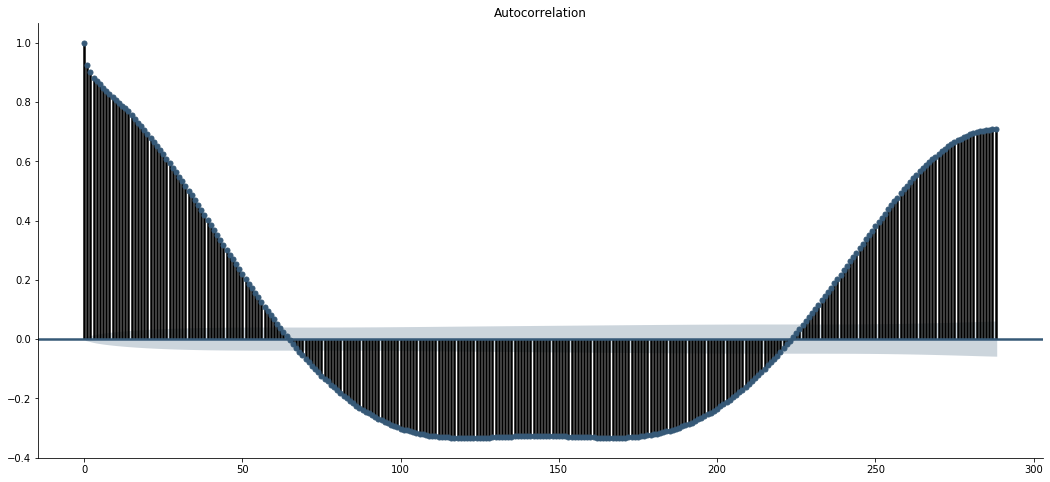

In [61]:
plot_acf(np.array(df[df.site==SITEID]["load"].dropna()),lags=24*60/5 * 1);

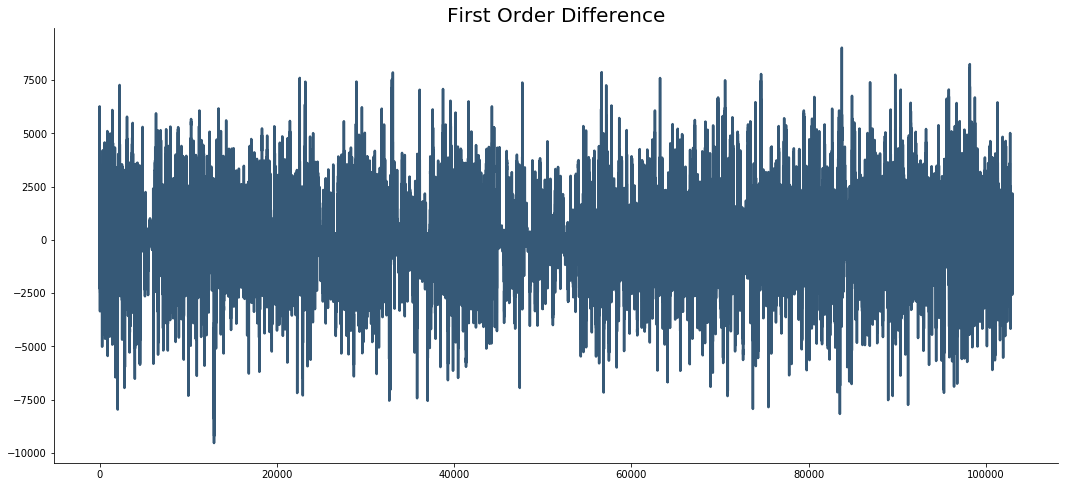

In [62]:
# First-order difference
site = df[df.site == SITEID]["load"]
site_diff = site.diff(-288).dropna()

# Plot
plt.title('First Order Difference', size=20)
plt.plot(np.arange(len(site_diff)), site_diff);
#plt.savefig('images/003_006_random_Walk_diff.png', dpi=300, bbox_inches='tight')

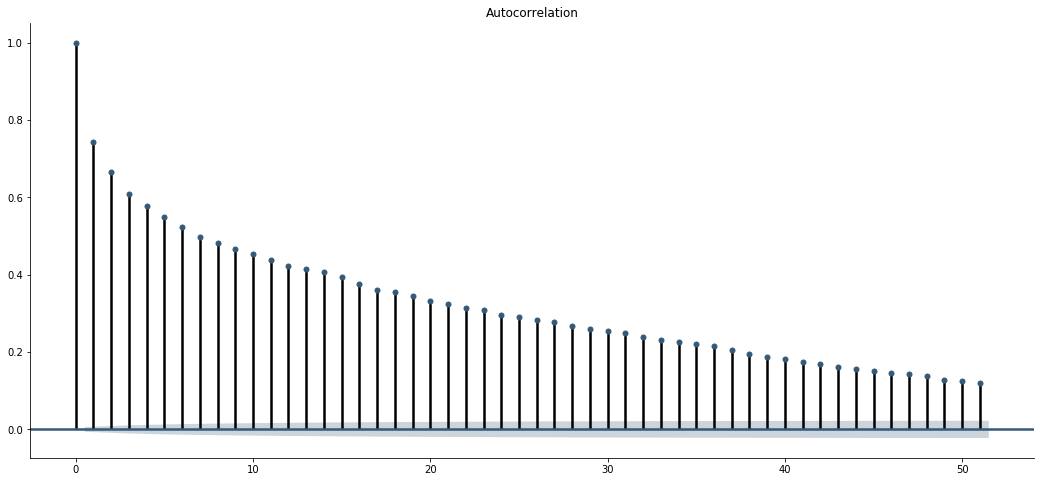

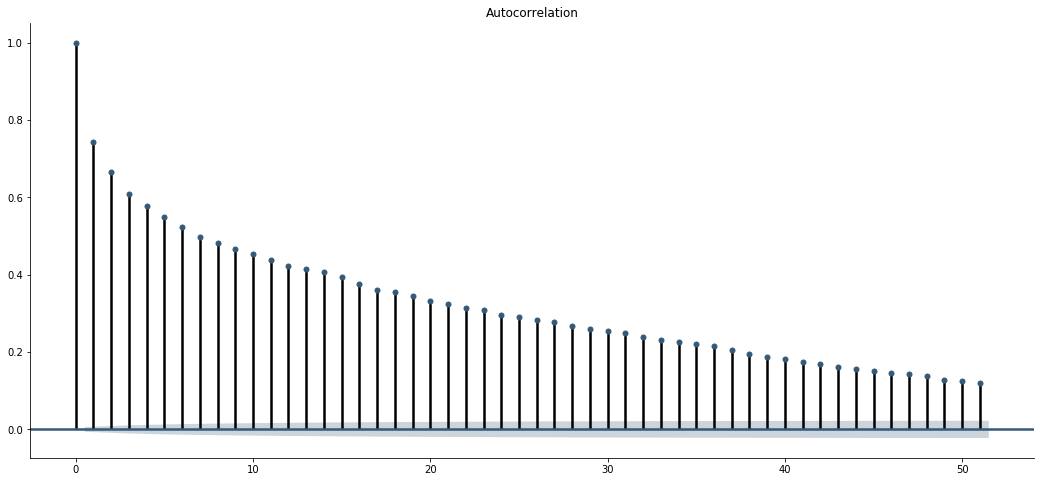

In [63]:
plot_acf(np.array(site_diff))